<a href="https://colab.research.google.com/github/Greta-gerasimov/NN/blob/main/NN_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q -U keras-tuner

In [9]:
from __future__ import absolute_import,division, print_function, unicode_literals

#TensorFlow and tf.keras
import tensorflow as tf
tf.random.set_seed(5)
from tensorflow import keras
from tensorflow.keras import callbacks
from tensorflow.keras.utils import to_categorical, to_ordinal
from tensorflow.keras.models import load_model
import tensorflow_datasets as tfds
from keras.optimizers import Adam
from keras.layers import Dense ,Dropout, Activation, Flatten
from keras.models import Sequential

#tf.logging.set_verbosity(tf.logging.ERROR)
#Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras_tuner as kt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, accuracy_score
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Улучшение отображения прогрессбара
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


print(tf.__version__)
#tf.enable_eager_execution()

2.13.0


In [10]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize.
train_images = (train_images / 255)
test_images = (test_images / 255)

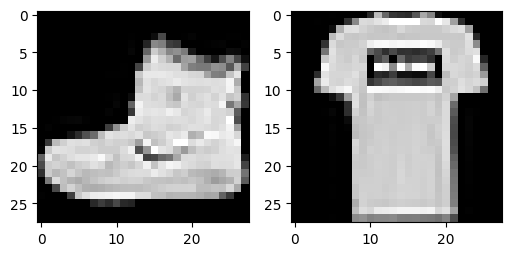

In [11]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(train_images[1], cmap='gray')

In [12]:
class_names = ['Футболка / топ', "Шорты", "Свитер", "Платье",
              "Плащ", "Сандали", "Рубашка", "Кроссовок", "Сумка",
              "Ботинок"]

In [13]:
# Flatten.
X_train_images = train_images.reshape((-1, 784))
X_test_images = test_images.reshape((-1, 784))

**На основании прошлого исследований (ДР № 2 & 1), строю архитектуру 2 слойной НС,с функцией активации relu и softmax,оптимизатор  Adam, пробую использовать  библиотеки TensorFlow
**

In [26]:

# Build the model.

model = Sequential([
     tf.keras.layers.Flatten(input_shape=(784,), name='input'),
     tf.keras.layers.Dense(256, activation='relu', name='hiden_one'),
     #keras.layers.Dense(128, activation='softmax', name='hiden_two'),
     tf.keras.layers.Dense(10, name='output')
      ])


# visual
config = model.get_config()
model.save_weights('fashion_weights.h5')
#


import os, time
model = model.from_config(config)
model.load_weights('fashion_weights.h5')
root_logdir = os.path.join(os.curdir, 'MNIST_logs')

def get_run_logdir():
  run_id = time.strftime('run_%H%M%S-%Y%m%d')
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()


# Compile the model.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
# train the model

history = model.fit(X_train_images,
                     train_labels, batch_size = 500,
                     epochs=25, verbose=0, callbacks =[tensorboard_cb])

313/313 - 2s - loss: 0.3131 - accuracy: 0.8918 - 2s/epoch - 5ms/step

Test accuracy: 0.8917999863624573
313/313 [==============================] - 1s 3ms/step


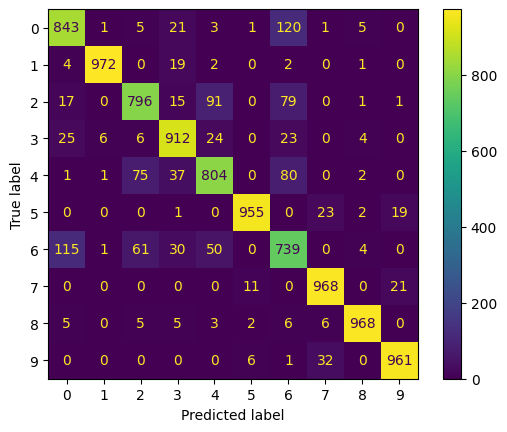

In [28]:
#Predictions
test_loss, test_acc = model.evaluate(X_test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(X_test_images)
y_pred = np.argmax(predictions, axis=1)

ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

In [29]:
def recall_precision(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
  precision = precision_score(y_true, y_pred, labels=labels, average=None)
  recall = recall_score(y_true, y_pred, labels=labels, average=None)
  for i, el in enumerate(zip(precision, recall)):
    print(f'Класс - {i}, точность - {el[0]:.3f}, полнота - {el[1]:.3f}')

In [30]:
recall_precision(test_labels, y_pred)

Класс - 0, точность - 0.835, полнота - 0.843
Класс - 1, точность - 0.991, полнота - 0.972
Класс - 2, точность - 0.840, полнота - 0.796
Класс - 3, точность - 0.877, полнота - 0.912
Класс - 4, точность - 0.823, полнота - 0.804
Класс - 5, точность - 0.979, полнота - 0.955
Класс - 6, точность - 0.704, полнота - 0.739
Класс - 7, точность - 0.940, полнота - 0.968
Класс - 8, точность - 0.981, полнота - 0.968
Класс - 9, точность - 0.959, полнота - 0.961


In [33]:
test_pred = np.argmax(model.predict(X_test_images), axis=1)

313/313 [==============================] - 3s 6ms/step


In [34]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.80      0.82      1000
           3       0.88      0.91      0.89      1000
           4       0.82      0.80      0.81      1000
           5       0.98      0.95      0.97      1000
           6       0.70      0.74      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



1/1 [==============================] - 0s 59ms/step


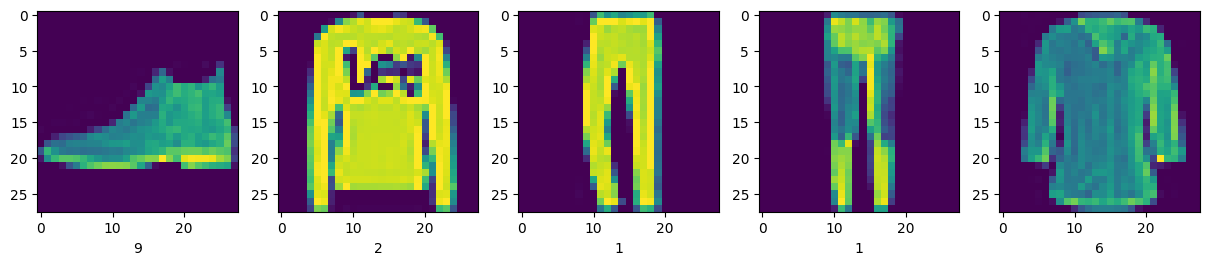

In [35]:
N = 5
y_pred = model.predict(test_images[:N,:])
y_pred_class = np.argmax(y_pred,axis=1)
plt.figure(figsize =(3*N,5))
for i in range(N):
  plt.subplot(1,N,i+1)
  plt.imshow(test_images[i,:].reshape(28,28))
  plt.xlabel(str(y_pred_class[i]))
plt.show()

In [36]:
# Predict on the first 10 test images.
predictions = model.predict(test_images[10:20])

# Print our model's predictions.
print(f'Predictions: {np.argmax(predictions, axis=1)}')

# Check our predictions against the ground truths.
print(f'True labels: {test_labels[10:20]}')

1/1 [==============================] - 0s 29ms/step
Predictions: [4 5 5 3 4 1 2 2 8 0]
True labels: [4 5 7 3 4 1 2 4 8 0]


в своей работе я использовала параметры, на основании исследований 1 и 2 др,в целом, подбор гиперпараметров помог добиться хороших результатов.